Name = Goutam Kumar Sah

Roll Number = 2312res271

Experiment No = 8

Title = Principal Component Analysis (PCA)

Aim = Implementation of Principal Component Analysis (PCA) Algorithm

platform = Google Colab

# Theory



 Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in
data science and machine learning to simplify complex datasets while preserving as much
variance (information) as possible. The main goal of PCA is to transform the original dataset with
multiple, possibly correlated variables, into a smaller set of uncorrelated variables known as
principal components.

 PCA works by identifying directions, or principal components, along which the data has the
highest variance. The first principal component captures the largest possible variance in the
data, followed by the second component, which is orthogonal to the first and captures the next
highest variance, and so on. These components serve as a new set of axes for the data, allowing
for a compact representation that minimizes redundancy and captures the essential structure.

 The process of PCA involves several key steps:
 1. Standardization: The dataset is normalized to ensure each feature has a mean of zero
and a unit variance.
 2. Covariance Matrix Computation: A covariance matrix is created to understand how the
variables relate to each other.
 3. Eigenvalue and Eigenvector Calculation: Eigenvectors and eigenvalues of the
covariance matrix are computed. Eigenvectors determine the direction of the principal
components, while eigenvalues indicate the magnitude of variance captured.
 4. Projection: Data is projected onto a subset of principal components, reducing
dimensionality.


PCA is widely used for data visualization, noise reduction, and feature extraction in fields like
image processing, bioinformatics, and finance. However, PCA assumes linearity and is sensitive
to scaling, so careful preprocessing is necessary. When used effectively, PCA helps uncover the
most important aspects of a dataset, making it a powerful tool for simplifying and interpreting
high-dimensional data

Algorithm of PCA

 Step 1 -  Standarize the Data.

 Step 2 - compute the Covariance matrix.

 Step 3 - Calculate the Eigenvectors and eigenvalues.

 Step 4 - Sort Eigenvalues and Eigenvectors

 Step 5 - Data transformation in new dimensional space.

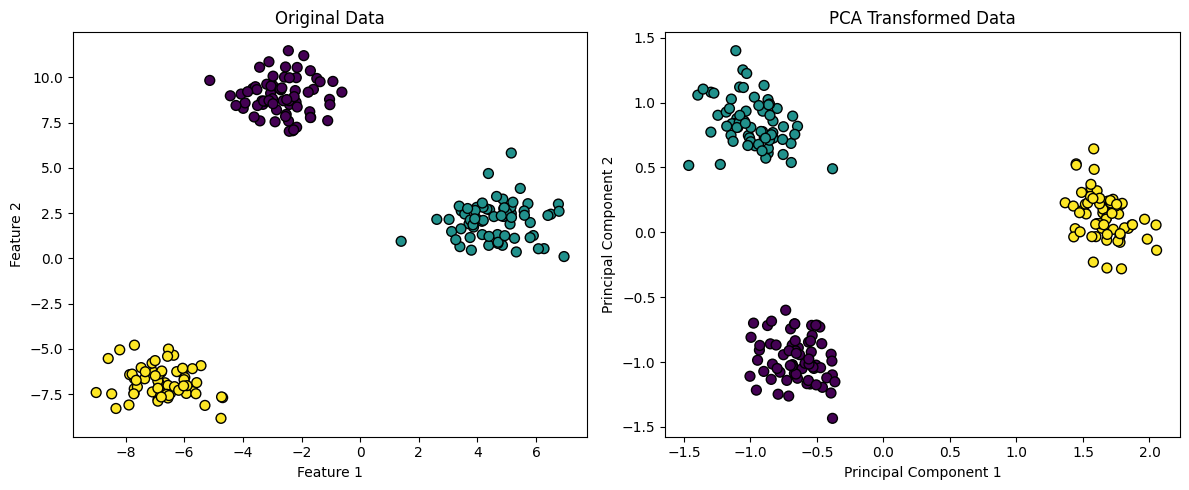

Explained Variance Ratios: [0.70351843 0.29648157]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=1.0)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)

# Step 4: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 5: Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Select the top k eigenvectors (principal components)
k = 2  # Number of principal components to keep
W = sorted_eigenvectors[:, :k]  # Select the first k eigenvectors

# Step 7: Project the data onto the new feature space
X_pca = X_scaled @ W  # Matrix multiplication to get the reduced data

# Step 8: Plot the original data and PCA transformed data
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Print explained variance
explained_variance = sorted_eigenvalues[:k] / np.sum(sorted_eigenvalues)
print("Explained Variance Ratios:", explained_variance)


Using Sklearn appllying PCA

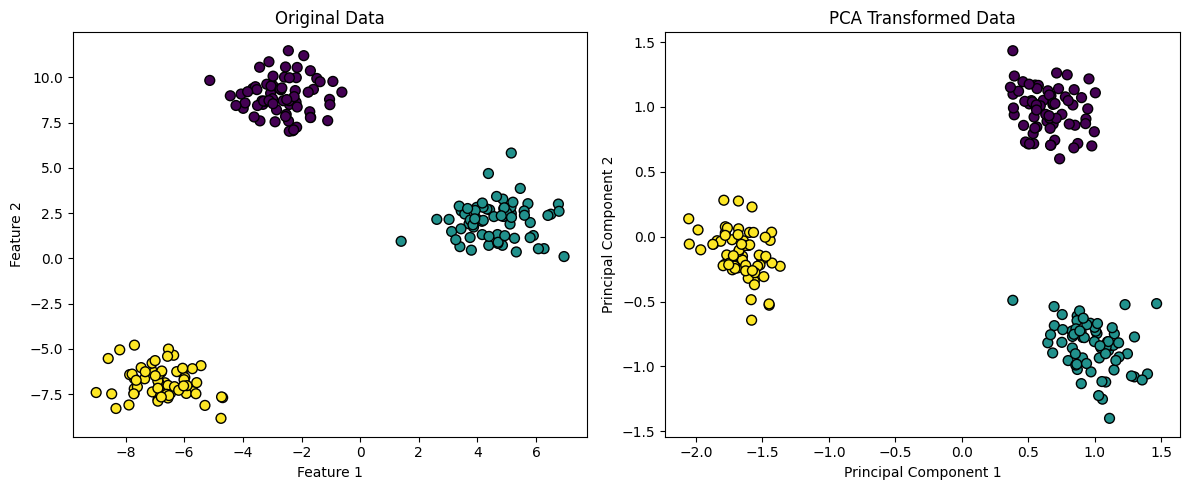

Explained Variance Ratios: [0.70351843 0.29648157]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=1.0)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # We want to reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plot the original data and PCA transformed data
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Print explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)
